# hw10 201810954 컴퓨터과학과 안지민

## 문제  

a) my_imresize function을 만드세요. 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)  

b) a)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.  

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data

In [2]:
def display_image_in_actual_size(im): #실제 사이즈로 이미지를 출력하는 함수

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()


In [26]:
def my_imresize(original_img, scale):
    inverse_scale = 1/scale 
    (ix, iy)= (int(x*scale), int(y*scale))
    interpolated_image=np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i*inverse_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inverse_scale
            icol = int(col)
            b = col - icol
            interpolated_image[i, j] = (original_img[irow,icol]*(1-a)*(1-b) + original_img[irow,icol+1]*a*(1-b) 
                               + original_img[irow+1,icol]*(1-a)*b + original_img[irow+1,icol+1]*a*b).astype("uint8")
    return interpolated_image

### 이미지의 원래 크기를 출력해보자

In [27]:
cam = data.camera()
(x,y)=cam.shape
original_img = cam.copy()


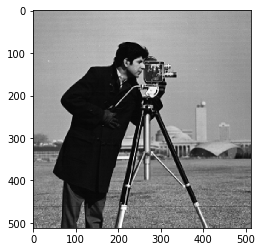

In [28]:
plt.imshow(original_img, cmap=plt.cm.gray)

원래 이미지의 0.688배 크기로 축소한 이미지를 출력해보자 

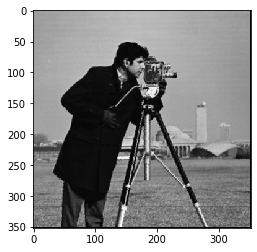

In [24]:
plt.imshow(my_imresize(original_img,0.688),cmap=plt.cm.gray)

원래 이미지의 2.9배 크기로 확대한 이미지를 출력해보자

In [25]:
plt.imshow(my_imresize(original_img,2.9),cmap=plt.cm.gray)

IndexError: index 513 is out of bounds for axis 1 with size 512